# Compute spin-spin correlation function from TWORDM

In [1]:
import numpy as np

k = 73
n = 114
s = 0

## twordm for Fe4S4

In [4]:
import rdmutils

twordm_spatial = rdmutils.get_twordm_spatialorbital_tensor(k,'fe8s7/rdm2mps.0.0.txt')

In [5]:
np.einsum('ijji->',twordm_spatial)

12882.0

In [6]:
n*(n-1)

12882

## rotate twordm to the original basis

In [8]:
import oodmrg_util

urot300 = oodmrg_util.loadUrot("fe8s7/urot300.txt",k)
urot300b = oodmrg_util.loadUrot("fe8s7/urot300b.txt",k)
urot300to500 = oodmrg_util.loadUrot("fe8s7/urot300to500.txt",k)

In [9]:
urot = urot300.dot(urot300b.dot(urot300to500))

In [10]:
twordm_spatial_lmo = rdmutils.twordm_backtransform(twordm_spatial,urot)

In [11]:
np.einsum('ijji->',twordm_spatial_lmo)

12881.999999996522

## spin-spin correlation funciton

In [12]:
orbs = [None]*14
orbs[0]  = [0,1,2]                           # _end
orbs[1]  = [3,4,5,6,7]                       # _fe1
orbs[2]  = [8,9,10,11,12,13,14]              # _s
orbs[3]  = [15,16,17,18,19]                  # _fe2
orbs[4]  = [20,21,22]                        # _s
orbs[5]  = [23,24,25,26,27]                  # _fe3
orbs[6]  = [28,29,30,31,32]                  # _fe4
orbs[7]  = [33,34,35,36,37,38,39]            # _s_middle
orbs[8]  = [40,41,42,43,44]                  # _fe5
orbs[9]  = [45,46,47,48,49]                  # _fe6
orbs[10] = [50,51,52,53,54,55,56,57,58]      # _s
orbs[11] = [59,60,61,62,63]                  # _fe7
orbs[12] = [64,65,66,67,68]                  # _fe8
orbs[13] = [69,70,71,72]                     # _end
groups = [orbs[1],orbs[3],orbs[5],orbs[6],\
	  orbs[8],orbs[9],orbs[11],orbs[12]]

In [16]:
import spinAnalysis

sisj = spinAnalysis.spinAnalysis(twordm_spatial_lmo,groups,k,n,s)


[spinAnalysis]: k,n,s= 73 114 0
<n>= 113.99999999996922
<s2>= 9.380585197504843e-11
igroup= 0 s2exp= 5.213479795064111 seff= 1.8374087779128647
igroup= 1 s2exp= 5.558451037071004 seff= 1.9100728281674404
igroup= 2 s2exp= 5.255374119938521 seff= 1.846353366383359
igroup= 3 s2exp= 5.361148110181597 seff= 1.8687862103156538
igroup= 4 s2exp= 5.295458154437158 seff= 1.85487964754829
igroup= 5 s2exp= 5.246599763532554 seff= 1.8444828349835607
igroup= 6 s2exp= 5.422858328147076 seff= 1.8817762968312275
igroup= 7 s2exp= 5.052781063204192 seff= 1.8027768157605268
s2sum= 1.223261620672234
[[ 5.2134798  -4.39869505 -4.01516282 -2.50580171  2.72209757  2.7837187
   2.04856532 -1.67798414]
 [-4.39869505  5.55845104  3.40777448  2.96325226 -3.43320783 -3.5109259
  -2.58372399  2.11633372]
 [-4.01516282  3.40777448  5.25537412  3.01204344 -3.49183628 -3.5708816
  -2.62784596  2.15247401]
 [-2.50580171  2.96325226  3.01204344  5.36114811 -4.04334251 -4.13483748
  -3.0428352   2.49237385]
 [ 2.7220975

In [20]:
ijdx = [7,5,4,6,2,3,1,0]
ijdx = np.ix_(ijdx,ijdx)
sisj_ordered = sisj[ijdx] # ordered Fe in the same ordering as in my previous paper

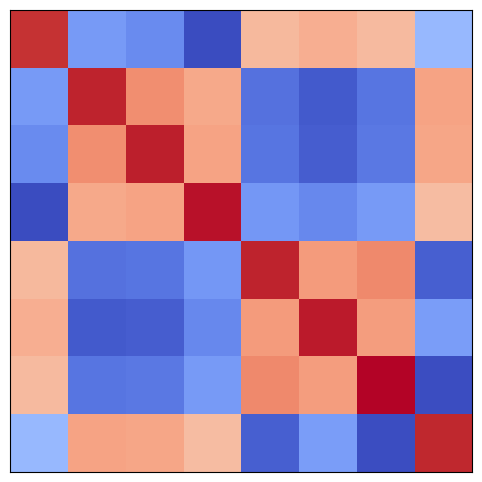

saved to fname= fe4s4.pdf


0

In [21]:
spinAnalysis.genSpinSpinPlot(sisj_ordered)

In [22]:
print(sisj)

[[ 5.2134798  -4.39869505 -4.01516282 -2.50580171  2.72209757  2.7837187
   2.04856532 -1.67798414]
 [-4.39869505  5.55845104  3.40777448  2.96325226 -3.43320783 -3.5109259
  -2.58372399  2.11633372]
 [-4.01516282  3.40777448  5.25537412  3.01204344 -3.49183628 -3.5708816
  -2.62784596  2.15247401]
 [-2.50580171  2.96325226  3.01204344  5.36114811 -4.04334251 -4.13483748
  -3.0428352   2.49237385]
 [ 2.72209757 -3.43320783 -3.49183628 -4.04334251  5.29545815  3.30588968
   2.78300371 -2.95596028]
 [ 2.7837187  -3.5109259  -3.5708816  -4.13483748  3.30588968  5.24659976
   2.63160549 -2.55243514]
 [ 2.04856532 -2.58372399 -2.62784596 -3.0428352   2.78300371  2.63160549
   5.42285833 -4.46510071]
 [-1.67798414  2.11633372  2.15247401  2.49237385 -2.95596028 -2.55243514
  -4.46510071  5.05278106]]


# Check MPS

In [1]:
import ctns_loader

ctns = ctns_loader.ctns_info()

ctns.load('fe8s7/rcanon_conf_su2_nonsu2.bin')

sites = ctns.toMPSdense()

In [2]:
import numpy as np
import mps_simple

shapes = mps_simple.shapes(sites)
print('shapes=\n',shapes)

shapes=
 [(1, 4, 1), (1, 4, 1), (1, 4, 1), (1, 4, 1), (1, 4, 1), (1, 4, 1), (1, 4, 1), (1, 4, 1), (1, 4, 1), (1, 4, 2), (2, 4, 3), (3, 4, 4), (4, 4, 5), (5, 4, 5), (5, 4, 6), (6, 4, 6), (6, 4, 7), (7, 4, 6), (6, 4, 6), (6, 4, 7), (7, 4, 6), (6, 4, 7), (7, 4, 6), (6, 4, 7), (7, 4, 6), (6, 4, 6), (6, 4, 7), (7, 4, 7), (7, 4, 7), (7, 4, 8), (8, 4, 8), (8, 4, 9), (9, 4, 9), (9, 4, 9), (9, 4, 9), (9, 4, 9), (9, 4, 9), (9, 4, 9), (9, 4, 9), (9, 4, 9), (9, 4, 9), (9, 4, 8), (8, 4, 7), (7, 4, 7), (7, 4, 7), (7, 4, 6), (6, 4, 6), (6, 4, 6), (6, 4, 5), (5, 4, 5), (5, 4, 6), (6, 4, 5), (5, 4, 6), (6, 4, 5), (5, 4, 4), (4, 4, 5), (5, 4, 4), (4, 4, 5), (5, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 3), (3, 4, 2), (2, 4, 1), (1, 4, 1), (1, 4, 1), (1, 4, 1), (1, 4, 1), (1, 4, 1), (1, 4, 1), (1, 4, 1), (1, 4, 4), (4, 4, 1)]


In [3]:
ova = mps_simple.overlap(sites,sites)
ova

array([[1.]])

In [4]:
mps_simple.checkRCF(sites)

check i= 72  site.shape= (4, 4, 1)  |S-I|= 6.280369834735101e-16
check i= 71  site.shape= (1, 4, 4)  |S-I|= 0.0
check i= 70  site.shape= (1, 4, 1)  |S-I|= 0.0
check i= 69  site.shape= (1, 4, 1)  |S-I|= 0.0
check i= 68  site.shape= (1, 4, 1)  |S-I|= 0.0
check i= 67  site.shape= (1, 4, 1)  |S-I|= 0.0
check i= 66  site.shape= (1, 4, 1)  |S-I|= 0.0
check i= 65  site.shape= (1, 4, 1)  |S-I|= 0.0
check i= 64  site.shape= (1, 4, 1)  |S-I|= 0.0
check i= 63  site.shape= (2, 4, 1)  |S-I|= 6.280369834735101e-16
check i= 62  site.shape= (3, 4, 2)  |S-I|= 3.8459253727671276e-16
check i= 61  site.shape= (4, 4, 3)  |S-I|= 3.1401849173675503e-16
check i= 60  site.shape= (4, 4, 4)  |S-I|= 3.1401849173675503e-16
check i= 59  site.shape= (4, 4, 4)  |S-I|= 3.1401849173675503e-16
check i= 58  site.shape= (5, 4, 4)  |S-I|= 6.661338147750939e-16
check i= 57  site.shape= (4, 4, 5)  |S-I|= 8.881784197001252e-16
check i= 56  site.shape= (5, 4, 4)  |S-I|= 6.661338147750939e-16
check i= 55  site.shape= (4, 4, 5) 

0

95.73933339356768 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.440892098500627e-16, 0.6931471805599452, 1.0986122886681096, 1.3862943611198904, 1.609437912434101, 1.6094379124341005, 1.7917594692280554, 1.791759469228055, 1.9459101490553126, 1.7917594692280543, 1.791759469228054, 1.9459101490553121, 1.7917594692280534, 1.945910149055312, 1.7917594692280534, 1.945910149055311, 1.7917594692280527, 1.7917594692280527, 1.9459101490553106, 1.9459101490553108, 1.945910149055311, 2.0794415416798335, 2.0794415416798344, 2.1972245773362165, 2.197224577336216, 2.197224577336215, 2.1972245773362147, 2.197224577336214, 2.197224577336213, 2.197224577336212, 2.1972245773362107, 2.1972245773362094, 2.197224577336209, 2.0794415416798273, 1.9459101490553055, 1.9459101490553055, 1.9459101490553052, 1.7917594692280479, 1.7917594692280476, 1.7917594692280474, 1.6094379124340943, 1.609437912434094, 1.791759469228047, 1.6094379124340934, 1.791759469228046, 1.6094379124340938, 1.3862943611198866, 1.6094379124

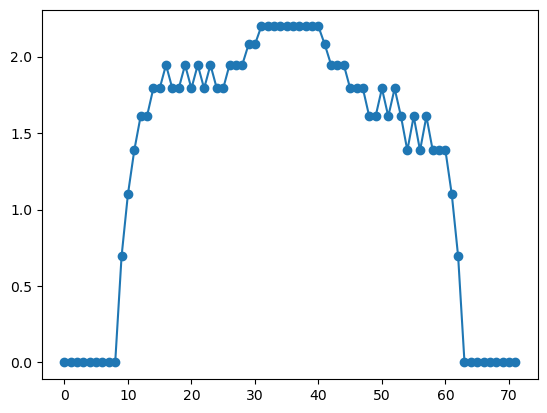

In [5]:
iroot = 0
svn = mps_simple.bipartiteEntropy(sites,iroot)
print(np.sum(svn),svn)

import matplotlib.pyplot as plt

plt.plot(svn,'o-')

In [6]:
spMPS = mps_simple.singleSiteEntropy(sites,iroot)
print('spMPS=\n',np.sum(spMPS),spMPS)

spMPS=
 22.18070977791854 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.93147181e-01  6.93147181e-01  6.93147181e-01
  6.93147181e-01 -4.44089210e-16  6.93147181e-01  2.22044605e-16
  6.93147181e-01  6.93147181e-01  1.44328993e-15  6.93147181e-01
  6.93147181e-01  6.93147181e-01  6.93147181e-01  6.93147181e-01
  6.93147181e-01  3.77475828e-15  6.93147181e-01  4.10782519e-15
  3.88578059e-15  6.93147181e-01  3.66373598e-15  6.93147181e-01
  3.21964677e-15  3.99680289e-15  4.77395901e-15  5.55111512e-15
  6.32827124e-15  7.10542736e-15  7.88258347e-15  8.65973959e-15
  9.43689571e-15  6.93147181e-01  6.93147181e-01  9.65894031e-15
  9.43689571e-15  6.93147181e-01  1.01030295e-14  1.04360964e-14
  6.93147181e-01  1.02140518e-14  6.93147181e-01  6.93147181e-01
  6.93147181e-01  6.93147181e-01  6.93147181e-01  6.93147181e-01
  6.93147181e-01  6.93147181e-01  6.93147181e-01  9.99200722e-15

In [7]:
spqMPS = mps_simple.twoSiteEntropy(sites,iroot)
print('spqMPS=\n',spqMPS)

spqMPS=
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.76996262e-15
  9.76996262e-15 9.76996262e-15]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.76996262e-15
  9.76996262e-15 9.76996262e-15]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.76996262e-15
  9.76996262e-15 9.76996262e-15]
 ...
 [9.76996262e-15 9.76996262e-15 9.76996262e-15 ... 0.00000000e+00
  9.76996262e-15 9.76996262e-15]
 [9.76996262e-15 9.76996262e-15 9.76996262e-15 ... 9.76996262e-15
  0.00000000e+00 9.76996262e-15]
 [9.76996262e-15 9.76996262e-15 9.76996262e-15 ... 9.76996262e-15
  9.76996262e-15 0.00000000e+00]]


In [8]:
IpqMPS = mps_simple.mutualInformation(spqMPS,spMPS)
print('IpqMPS=\n',IpqMPS)

IpqMPS=
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  9.76996262e-15 9.76996262e-15]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.76996262e-15
  0.00000000e+00 9.76996262e-15]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.76996262e-15
  9.76996262e-15 0.00000000e+00]]


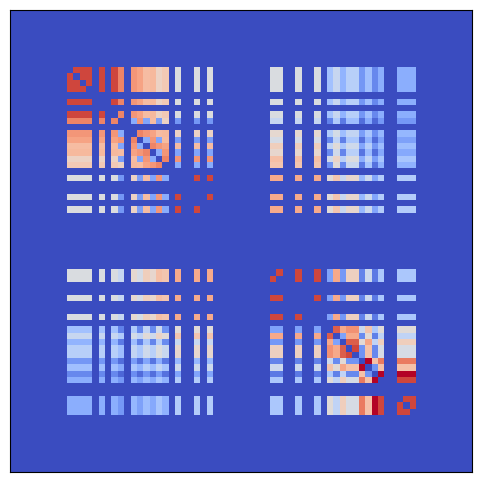

In [10]:
import matplotlib.pyplot as plt
from matplotlib import cm

ischeme = 'nearest'
fig, axes = plt.subplots(1, 1, figsize=(12, 6),
             subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.05)
clmap = cm.coolwarm
im = axes.imshow(IpqMPS,interpolation=ischeme,cmap=clmap)
plt.show()